### Support Vector Machines

This assignment will build off of the previous ungraded assignment. However, here you will use a radial basis function  for your kernel rather than a linear specification. 

To begin, a synthetic data set has been provided below. It is normally distributed with an added offset to create two separate classes.

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.4     ✔ recipes      1.0.5
✔ dials        1.1.0     ✔ rsample      1.1.1
✔ dplyr        1.1.0     ✔ tibble       3.2.0
✔ ggplot2      3.4.1     ✔ tidyr        1.3.0
✔ infer        1.0.4     ✔ tune         1.0.1
✔ modeldata    1.1.0     ✔ workflows    1.1.3
✔ parsnip      1.0.4     ✔ workflowsets 1.0.0
✔ purrr        1.0.1     ✔ yardstick    1.1.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



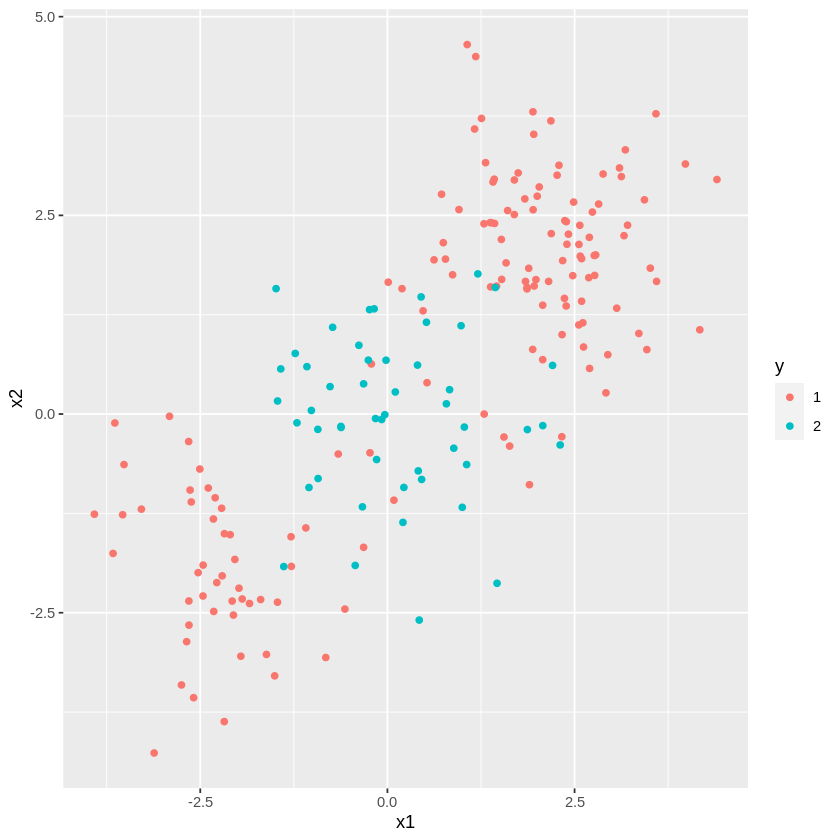

In [1]:
library(tidymodels)
library(ISLR2)

set.seed(1)
sim_data2 <- tibble(
  x1 = rnorm(200) + rep(c(2, -2, 0), c(100, 50, 50)),
  x2 = rnorm(200) + rep(c(2, -2, 0), c(100, 50, 50)),
  y  = factor(rep(c(1, 2), c(150, 50)))
)

sim_data2 %>%
  ggplot(aes(x1, x2, color = y)) +
  geom_point()

Now, you will try an SVM using a radial basis function (RBF). RBF should allow you to capture the non-linearity in the data. To create the specification, you should use `svm_rbf()`. Be sure to pass in classification as the mode and kernlab as the engine. Save your output to `svm_rbf_spec`. Do not set the scaled parameter to 'False'.

In [2]:
# Split the data into training and testing sets
set.seed(123)
data_split <- initial_split(sim_data2, prop = 0.75)
train_data <- training(data_split)
test_data <- testing(data_split)

# Create the SVM specification with RBF kernel
svm_rbf_spec <- svm_rbf(mode = "classification") %>%
  set_engine("kernlab")

Now fit your model using `fit()` and store it in `svm_rbf_fit`.

In [3]:
# Fit the model
svm_rbf_fit <- fit(svm_rbf_spec, y ~ x1 + x2, data = train_data)

Plot your model and store it in `fit_plot`. What do you notice? 

In [4]:
grid <- expand.grid(
  x1 = seq(min(sim_data2$x1) - 1, max(sim_data2$x1) + 1, length.out = 100),
  x2 = seq(min(sim_data2$x2) - 1, max(sim_data2$x2) + 1, length.out = 100)
)
grid_predictions <- predict(svm_rbf_fit, new_data = grid)
grid$pred <- grid_predictions$.pred_class



Attaching package: ‘kernlab’


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:scales’:

    alpha


ERROR while rich displaying an object: Error in `geom_contour()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 2nd layer.
Caused by error in `FUN()`:
! object 'y' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %i

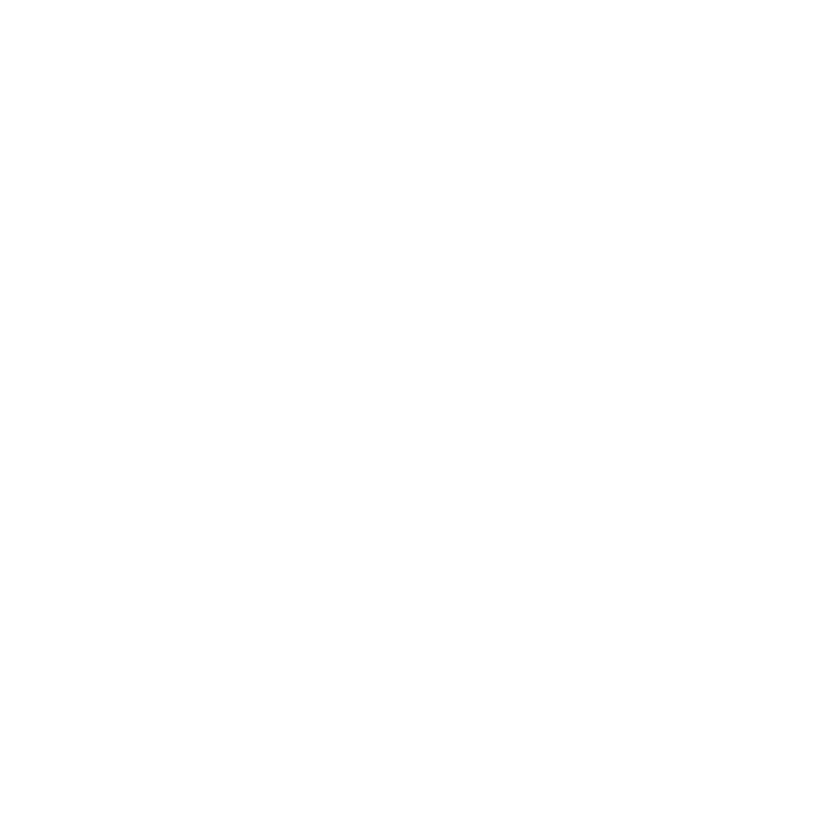

In [5]:
library(kernlab)

fit_plot <- ggplot(train_data, aes(x1, x2, color = y)) +
  geom_point() +
  geom_contour(data = grid, aes(x = x1, y = x2, z = as.numeric(pred)), bins = 1)

fit_plot

Now, let's see how well this model generalizes to new data from the sam generating process. 

In [8]:
set.seed(2)
sim_data2_test <- tibble(
  x1 = rnorm(200) + rep(c(2, -2, 0), c(100, 50, 50)),
  x2 = rnorm(200) + rep(c(2, -2, 0), c(100, 50, 50)),
  y  = factor(rep(c(1, 2), c(150, 50)))
)

In [9]:
augment(svm_rbf_fit, new_data = sim_data2_test) %>%
  conf_mat(truth = y, estimate = .pred_class)

          Truth
Prediction   1   2
         1 138   8
         2  12  42

What do you notice?